<a href="https://colab.research.google.com/github/MataiasCost/Python_UERJ/blob/main/projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando a classe MyPerceptron**





"No final da década de 1950, Rosenblatt na Universidade de Cornell, criou uma genuína rede de múltiplos neurônios do tipo discriminadores lineares e chamou esta rede de perceptron." [Fonte: Notas de aula do Prof. Luiz Marcos Garcia Gonçalves — UFRN.](https://www.dca.ufrn.br/~lmarcos/courses/ia/notes/perceptrons.pdf)

"A simplicidade da rede Perceptron está associada à sua condição de ser constituída de apenas uma camada neural, tendo-se também somente um neurônio artificial nesta camada única. O Perceptron pertence à arquitetura feedforward de camada única, pois o fluxo de informação em sua estrutura reside sempre no sentido da camada de entrada em direção à camada neural de saída, inexistindo-se qualquer tipo de realimentação de valores produzidos pelo seu único neurônio. Pode-se também combinar esse neurônio a outros para assim criar uma rede de multiplas camadas." [Fonte: Coluna "Redes Neurais Artificiais", por Anderson Vinicius, no portal Medium.](https://medium.com/@avinicius.adorno/redes-neurais-artificiais-418a34ea1a39)

Um perceptron pode ser treinado, com base em uma base de dados que conhecemos a classificação, para retornar verdadeiro ou falso os dados de uma determinada amostra cuja classificação é desconhecida. 

Neste trabalho, desenvolvemos um perceptron na classe MyPerceptron. Em seguida, o utilizamos para fazer previsões acerca de flores Iris da espécie Setosa de uma amostra conhecida. Comparamos, então, os resultado obtidos com o MyPerceptron com aqueles obtidos utilizando o método scikit-learn. Repetimos o mesmo processo, agora para Iris das espécies Virginica e Versicolor. Por último, apresentamos outros possíveis exemplos de aplicação dentro do escopo do perceptron.

In [ ]:
import numpy as np

class MyPerceptron():
  
  def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
    self.n_inputs = no_of_inputs # no_of_inputs: número de features passadas como input ao perceptron
    self.threshold = threshold # threshold: número de iterações de atualização do peso
    self.lr = learning_rate # learning_rate: taxa com a qual os pesos são atualizados a cada iteração
    self.weight = np.zeros(no_of_inputs+1) # weights: inicialização dos pesos, que terá o_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
  
  def predict(self, inputs):
    ''' Método de implementação da função de ativação. '''
    
    array_input = np.append(1,inputs) # incluindo o input x_0 = 1, cujo peso é dado pelo bias, "w_0 = b"
    result = np.dot(self.weight, array_input) # uma vez que os vetores têm a mesma dimensão, podemos tomar o produto escalar
    return np.heaviside(result,0) # por fim, utilizamos a função degrau Heaviside como ativação do Perceptron

  def train(self, training_inputs, labels):
    ''' É fundamental treinar o Perceptron para obtermos o resultado desejado em análises futuras.
    Para isso, utilizamos resultados conhecidos para ajustar os pesos um número de vezes igual ao 'threshold'. '''
    
    new_input = [] # criando uma nova lista vazia para inserir o input x_0=1 aos inputs já incluídos em 'training_inputs'
    
    for k in range(len(training_inputs)): # ajustamos a dimensão do input inserindo x_0 = 1, cujo peso é dado pelo bias, "w_0 = b"
      new_input.append(np.concatenate([[1],training_inputs[k]]))
    
    for j in range(self.threshold):
      for i in range(len(labels)):
        erro = labels[i] - self.predict(training_inputs[i])
        delta_weight = (self.lr)*(erro)*(new_input[i])
        self.weight = np.add(self.weight, delta_weight)
        #print(i,self.weight)
  

A função de ativação utilizada nesta classe perceptron é a função de Heaviside, também conhecida como função degrau. 

Para construir o método *train* da classe *MyPerceptron*, cria-se um novoarray, denominado *new_input*, cujos elementos também são arrays. Entretanto, o que o diferencia do *training_inputs*, é o fato de que o elemento zero de cada um dos arrays que o compõe é dado por $x_0=1$, o que corresponde ao input cujo peso é dado pelo bias, $w_0=b$. Portanto, cada elemento do array *new_input* tem a mesma dimensão do parâmetro *self.weights*, e podemos, então, realizar as operações de soma e produto escalar entre estas quantidades.

# **Comparação com o método *linear_model* do módulo *scikit-learn*:** 

Primeiramente, iremos utilizar o scikit-learn para fazer uma predição se os valores correspondem a uma Iris da espécie Setosa.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)    # target = label
print(iris.feature_names)
#print(iris)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:

X = iris.data[:, (2,3)]  # nos retorna um array com 150 conjuntos de inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
print("iris setosa classification: ", y)

perceptron_clf = Perceptron()      # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,y)            # Train

#print(X)

y_pred = perceptron_clf.predict([[1,0.5]])  # predict
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris setosa classification:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1]


De acordo com este método, esta corresponde a uma Iris Setosa. O que o nosso Perceptron tem a dizer sobre isso?

In [ ]:
perceptron = MyPerceptron(2)  # criando um perceptron da classe MeuPerceptron com dois inputs
X = iris.data[:, (2,3)] # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim


treino = perceptron.train(X,y)
pred = perceptron.predict([1, 0.5])
print(pred)

1.0


Conclui-se, portanto, que a predição do Perceptron está de acordo com aquela feita utilizando o método scikit-learn.

# **Separando a amostra em *treino* e *teste*:**

É interessante, ainda, separar a amostra das iris em duas: uma ser utilizada como **teste** e outra para **treinar** o perceptron. Neste ponto, é conveniente utilizar o método *train_test_slit* do módulo scikit-learn. Isso é feito da seguinte forma:

In [ ]:
# Implementando o método 'train_test_slit'

from sklearn.model_selection import train_test_split  # importando o módulo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)  # separando a amostra explicitamente em 'teste' e 'treino'

Agora, utiliza-se o perceptron definido na classe *MyPerceptron* para classificar as amostra de teste, cujos inputs estão contidos em *X_test*, e, em seguida, comparar estes resultados com os labels, dispostos em *y_test*. Comparamos, ainda, com as predições dadas pelo método *scikit-learn*.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # importando o módulo
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


def Diferentes_scatters(Tipo_Planta):
  
  # SINOPSE:
  # Tipo_planta = 0 para setosa, 1 para versicolor e 2 para virginica
  
  # 1 - Pegamos a informação de qual tipo de Iris desejamos analisar

  iris = load_iris()
  X = iris.data[:, (2,3)] # inputs
  y = (iris.target == Tipo_Planta).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim'''
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)  # separando a amostra explicitamente em 'teste' e 'treino'

  # 2 — Treino dos perceptrons utilizando a fatia das amostras definidas para este propósito

  # 2.1 — Treinando o perceptron do módulo scikit-learn
  
  perceptron_clf = Perceptron()      # dois inputs: comprimento e largura da pétala
  perceptron_clf.fit(X_train, y_train)  # train

  # 2.2 — Treinando MyPerceptron

  perceptron = MyPerceptron(2)  # criando um perceptron da classe MeuPerceptron com dois inputs
  perceptron.train(X_train, y_train)  #train

  # 3 — Testamos a precisão do MyPerceptron em relação ao scikit-learn

  count = 0
  for x in X_test:
    if perceptron_clf.predict([x]) == perceptron.predict(x):
      count += 1
  print(f"O MyPerceptron teve {count*100/len(y_test):.2f}% das predições iguais ao Perceptron do módulo scikit-learn\n")

  # 4 — Separa-se as Iris da espécie "[Tipo_Planta]" das demais, denotadas como "não-[Tipo-Planta]"

  planta_comp_nosso = []  # criando listas para alocar as predições do MyPerceptron
  planta_largura_nosso = []
  nao_planta_comp_nosso = []
  nao_planta_largura_nosso = []

  planta_comp_sklearn = []  # criando listas para alocar as predições do scikit-learn
  planta_largura_sklearn = []
  nao_planta_comp_sklearn = []
  nao_planta_largura_sklearn = []

  planta_comp_teste = []  # criando listas para alocar os dados da amostra
  planta_largura_teste = []
  nao_planta_comp_teste = []
  nao_planta_largura_teste = []

  # Selecionando as predições e os dados da amostra

  for x in X_test:  # predições MyPerceptron
    if perceptron.predict([x]) == 1:
      planta_comp_nosso.append(x[0])
      planta_largura_nosso.append(x[1])
    else:
      nao_planta_comp_nosso.append(x[0])
      nao_planta_largura_nosso.append(x[1])

  for x in X_test:  # predições scikit-learn
    if perceptron_clf.predict([x]) == 1:
      planta_comp_sklearn.append(x[0])
      planta_largura_sklearn.append(x[1])
    else:
      nao_planta_comp_sklearn.append(x[0])
      nao_planta_largura_sklearn.append(x[1])

  for i in range(len(y_test)):  # validação dos dados da amostra
    if y_test[i] == 1:
      planta_comp_teste.append(X_test[i][0])
      planta_largura_teste.append(X_test[i][1])
    else:
      nao_planta_comp_teste.append(X_test[i][0])
      nao_planta_largura_teste.append(X_test[i][1])

  # 5 — Por fim, dispomos estas informações em gráficos
  
  # Criamos um gráfico do comprimento em função da largura das pétalas das Iris
  # Aqui, vamos comparar, utilizando três diferentes gráficos: Dados da amostra, predição do scikit-learn e predição do MyPerceptron

  if Tipo_Planta == 0:  # Iris Setosa
    label_1 = "Setosa"
    label_2 = "Não-Setosa"

  if Tipo_Planta == 1:  # Iris Versicolor
    label_1 = "Versicolor"
    label_2 = "Não-Versicolor"

  if Tipo_Planta == 2:  # Iris Virginica
    label_1 = "Virginica"
    label_2 = "Não-Virginica"

  f, axes = plt.subplots(nrows = 1, ncols = 3,figsize=(20,6)) #, sharex=True, sharey = True)

  # 5.1 — Predições do MyPerceptron

  axes[2].title.set_text('Predições do nosso Perceptron')
  axes[2].scatter(planta_comp_nosso,planta_largura_nosso,c="green",label = label_1)
  axes[2].scatter(nao_planta_comp_nosso,nao_planta_largura_nosso,c="red",label = label_2)
  axes[2].set_xlabel('Comprimento da pétala (cm)')
  axes[2].set_ylabel('Largura da pétala (cm)')
  axes[2].legend()

  # 5.2 — Predições do scikit-learn

  axes[1].title.set_text('Predições do scikit-learn')
  axes[1].scatter(planta_comp_sklearn,planta_largura_sklearn,c="green",label = label_1)
  axes[1].scatter(nao_planta_comp_sklearn,nao_planta_largura_sklearn,c="red",label = label_2)
  axes[1].set_xlabel('Comprimento da pétala (cm)')
  axes[1].set_ylabel('Largura da pétala (cm)')
  axes[1].legend()

  # 5.3 — Dados da amostra

  axes[0].title.set_text('Dados da Amostra')  
  axes[0].scatter(planta_comp_teste,planta_largura_teste,c="green",label = label_1)
  axes[0].scatter(nao_planta_comp_teste,nao_planta_largura_teste,c="red",label = label_2)
  axes[0].set_xlabel('Comprimento da pétala (cm)')
  axes[0].set_ylabel('Largura da pétala (cm)')  
  axes[0].legend()


  plt.show()  

O MyPerceptron teve 100.00% das predições iguais ao Perceptron do módulo scikit-learn



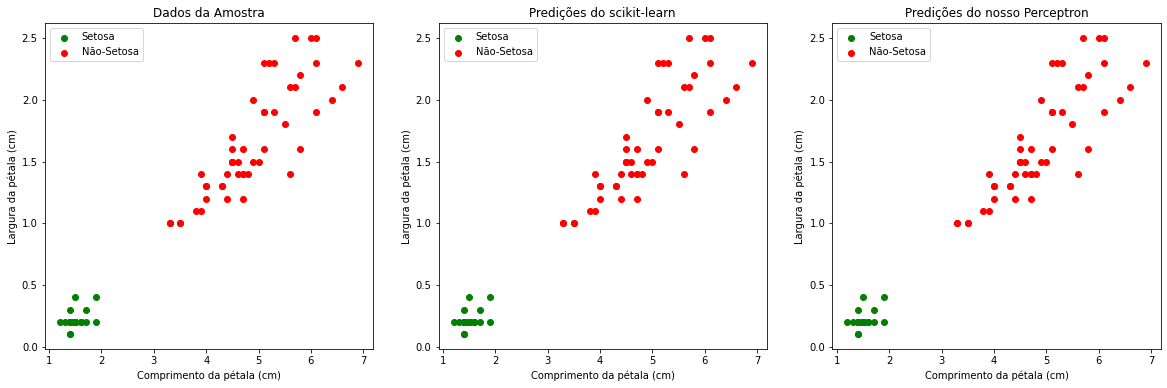

In [ ]:
 Diferentes_scatters(0) # Espécie Setosa

A partir do gráfico, podemos observar a distribuição de Iris Setosas e não-Setosas. Portanto, considerando como inputs apenas o comprimento e largura das pétalas, é possível concluir que todas as predições feitas pelo perceptron estão em perfeita concordância com os dados da amostra e com as predições do *scikit-learn*.

# **Quando este método falha?**

Há duas limitações intrínsicas ao perceptron: seus valores de saída são binários — positivo (verdadeiro) ou negativo (falso); a capacidade de classificar apenas grupos de vetores linearmente separados.

Neste trabalho, consideramos apenas dois inputs — largura e comprimento da pétala — para classificar se uma determinada Iris é da espécie Setosa ou não. Neste caso, o Perceptron cria uma reta que divide o espaço em duas regiões distintas: uma na qual ele é ativado (predição 'sim'), e outra na qual ele não é ativado (predição 'não'). O treinamento é responsável por ajustar os coeficientes linear e angular da equação da reta em questão, o que é feito um número de vezes determinado pelo threshold, até que os 'pesos' finais sejam determinados. Então, utiliza-se o Perceptron para efetivamente realizar predições acerca de uma determinada amostra.

A partir dos gráficos dispostos acima, é possível inferir que as flores da espécie Iris Setosa da amostra de teste possuem características muito semelhantes entre si, e, em particular, bem distintas das duas demais espécies. Isto, portanto, explica a alta precisão para as Iris Setosa: a reta dada pelo Perceptron é perfeitamente capaz de separar os pontos correspondentes à Iris da espécie Setosa das demais. Desta forma, embora a concordância entre as previsões do Perceptron e os dados da amostra tenha sido excelente para o caso das Iris Setosa, podemos esperar divergências quando analisamos as demais espécies.

O MyPerceptron teve 29.33% das predições iguais ao Perceptron do módulo scikit-learn



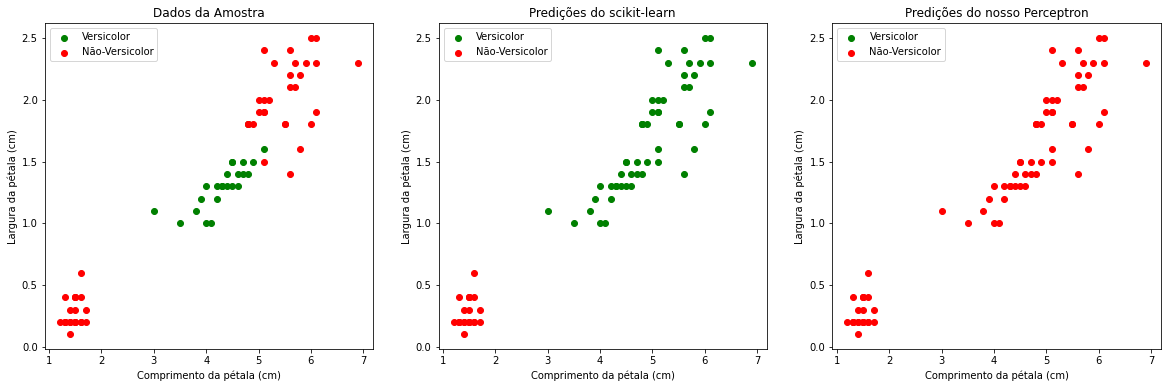

O MyPerceptron teve 65.33% das predições iguais ao Perceptron do módulo scikit-learn



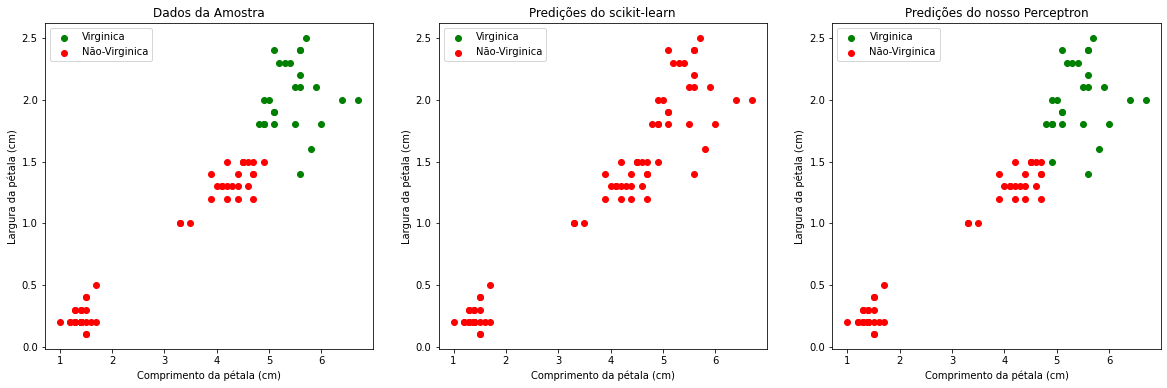

In [ ]:
Diferentes_scatters(1) # Espécie Versicolor
Diferentes_scatters(2) # Espécie Virginica

É possível concluir, portanto, que a precisão do MyPerceptron diminui quando analisamos as amostras de flores das espécies Versicolor e Virginica. Como discutido anteriormente, atribuimos isso ao fato de que, para essas espécies, o comprimento e largura da pétala não são características tão discriminatórias quanto no caso da espécie Setosa.

# **Outros exemplos de aplicação do Perceptron**

Nota-se a limitação do Perceptron em fazer predições precisas para amostras de dados onde se é conveniente aplicar uma função linear. Como exemplos de aplicação do perceptron, temos:

* Verificar se o ser vivo é  quadrúpede ou bípede;
* Identificar padrões geométricos;
* Projeção de autorização de credito; 
* Avaliação de risco de falência; 
* Previsão econômica e financeira; 
* Avaliação de crédito.

Cada um desses exemplos tem a missão de de dizer se algo é ou não é, se algo pode ou não ser feito. Seram sempre decisões binarias, por mas complexos que possam ser os dados analisados por eles.

Uma alternativa visando melhorar a precisão das predições do perceptron é utilizar uma função de ativação não-linear, como, por exemplo, a função sigmoide. Além disso, poderíamos pensar também na criação de uma cadeia de neurônios, onde cada neurônio poderia realizar uma predição diferente para um mesmo input e o cruzamento dessas decisões levaria a uma decisão final que, novamente, seria binária.